## Random Forest Classifier

In [47]:
import numpy as np
import pandas as pd

In [48]:
wells = pd.read_csv('train.csv',sep=';')

In [49]:
wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [50]:
wells.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [51]:
wells.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


In [52]:
%matplotlib inline

In [53]:
import matplotlib.pyplot as plt

In [54]:
# wells.hist(bins=50, figsize=(20, 15))

In [55]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wells, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 936408
Rows in test set:234103



In [56]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(wells, wells['FORCE_2020_LITHOFACIES_LITHOLOGY']):
    strat_train_set = wells.loc[train_index]
    strat_test_set = wells.loc[test_index]

In [57]:
strat_test_set['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000    216241
30000     50681
65030     45137
70000     16896
80000      9999
99000      4574
70032      3154
88000      2464
90000      1146
74000       506
86000       325
93000        31
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [58]:
strat_train_set['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000    504562
30000    118256
65030    105318
70000     39424
80000     23330
99000     10671
70032      7359
88000      5749
90000      2674
74000      1182
86000       760
93000        72
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [59]:
wells = strat_train_set.copy()

In [60]:
litho_keys = {30000: 'Sandstone',
                     65030: 'Sandstone/Shale',
                     65000: 'Shale',
                     80000: 'Marl',
                     74000: 'Dolomite',
                     70000: 'Limestone',
                     70032: 'Chalk',
                     88000: 'Halite',
                     86000: 'Anhydrite',
                     99000: 'Tuff',
                     90000: 'Coal',
                     93000: 'Basement'}

litho_numbers = {30000: 0,
             65030: 1,
             65000: 2,
             80000: 3,
             74000: 4,
             70000: 5,
             70032: 6,
             88000: 7,
             86000: 8,
             99000: 9,
             90000: 10,
             93000: 11}
wells['LITHOLOGY'] = wells['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(litho_keys)
wells['LITH_LABEL'] = wells['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(litho_numbers)  

In [61]:

wells.count()

WELL                                 819357
DEPTH_MD                             819357
X_LOC                                811785
Y_LOC                                811785
Z_LOC                                811785
GROUP                                818451
FORMATION                            723580
CALI                                 757714
RSHA                                 440891
RMED                                 792013
RDEP                                 811606
RHOB                                 706612
GR                                   819357
SGR                                   48547
NPHI                                 535673
PEF                                  470531
DTC                                  762737
SP                                   604941
BS                                   477786
ROP                                  374441
DTS                                  122533
DCAL                                 208810
DRHO                            

## Looking for correlations

In [62]:
# from pandas.plotting import scatter_matrix
# attributes = ["LITH_LABEL","RDEP","RSHA","SGR","GR","DTC"]
# scatter_matrix(wells[attributes], figsize = (12,8))

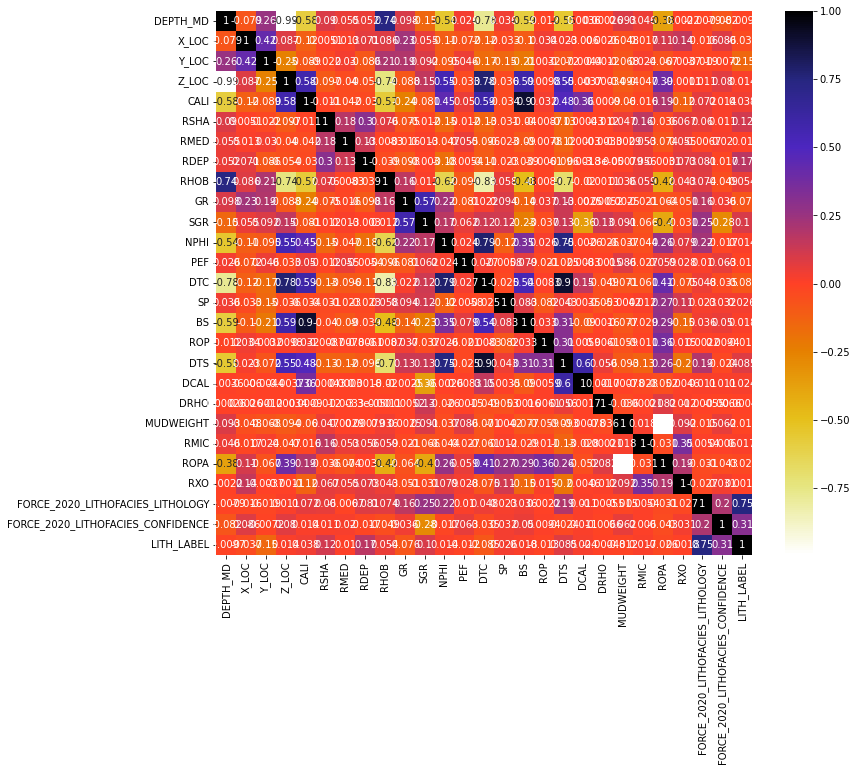

In [63]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = wells.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [64]:
abs(wells.corr()["LITH_LABEL"])

DEPTH_MD                             0.009675
X_LOC                                0.036998
Y_LOC                                0.153234
Z_LOC                                0.014494
CALI                                 0.038436
RSHA                                 0.118811
RMED                                 0.010189
RDEP                                 0.170593
RHOB                                 0.053889
GR                                   0.076415
SGR                                  0.102248
NPHI                                 0.014314
PEF                                  0.011748
DTC                                  0.085371
SP                                   0.026316
BS                                   0.017803
ROP                                  0.012894
DTS                                  0.084710
DCAL                                 0.023541
DRHO                                 0.000484
MUDWEIGHT                            0.012312
RMIC                              

In [65]:
abs(wells.corr()["LITH_LABEL"][abs(wells.corr()["LITH_LABEL"])>0.08].drop('LITH_LABEL')).index.tolist()

['Y_LOC',
 'RSHA',
 'RDEP',
 'SGR',
 'DTC',
 'DTS',
 'FORCE_2020_LITHOFACIES_LITHOLOGY',
 'FORCE_2020_LITHOFACIES_CONFIDENCE']

In [66]:
wells = wells.drop(columns=['WELL','GROUP','FORMATION','LITHOLOGY','RDEP','RSHA','RMED','RXO','RMIC','SP','PEF','DRHO','CALI','BS','DCAL','ROPA','SGR','MUDWEIGHT','ROP','DEPTH_MD','X_LOC','Y_LOC','Z_LOC','FORCE_2020_LITHOFACIES_LITHOLOGY','FORCE_2020_LITHOFACIES_CONFIDENCE'])

In [67]:
wells_labels = wells['LITH_LABEL'].copy()
wells = wells.drop('LITH_LABEL',axis=1)

## Missing Attributes(Fixed with median strategy)

In [68]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="median",verbose=0)
imputer.fit(wells)

SimpleImputer(strategy='median')

In [69]:
imputer.statistics_

array([  2.32141817,  68.36798096,   0.32677987, 109.61088562,
       188.1870575 ])

In [70]:
X = imputer.transform(wells)

In [71]:
wells_tr = pd.DataFrame(X, columns=wells.columns)

In [72]:
wells_tr.describe()

,RHOB,GR,NPHI,DTC,DTS
count,819357.000000,819357.000000,819357.000000,819357.000000,819357.000000
mean,2.289823,70.913023,0.330216,113.112152,190.659149
std,0.235698,34.273461,0.105578,28.955283,28.142880
min,0.720971,0.109284,-0.035822,7.415132,69.163177
25%,2.122728,47.603203,0.289922,89.082230,188.187058
50%,2.321418,68.367981,0.326780,109.610886,188.187058
75%,2.462964,89.030807,0.365337,139.344025,188.187058
max,3.457820,1076.963867,0.999570,320.478882,676.578125


In [73]:
wells_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819357 entries, 0 to 819356
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   RHOB    819357 non-null  float64
 1   GR      819357 non-null  float64
 2   NPHI    819357 non-null  float64
 3   DTC     819357 non-null  float64
 4   DTS     819357 non-null  float64
dtypes: float64(5)
memory usage: 31.3 MB


In [74]:
wells_tr

,RHOB,GR,NPHI,DTC,DTS
0,1.998502,35.511620,0.326780,136.214539,188.187058
1,2.386391,74.202171,0.324758,97.646278,188.187058
2,2.097234,54.749004,0.326780,112.143600,188.187058
3,2.608077,112.751190,0.323006,89.314407,188.187058
4,1.829969,101.398727,0.496901,150.068527,188.187058
...,...,...,...,...,...
819352,2.185823,78.866264,0.326780,121.563728,276.375183
819353,2.353279,82.787140,0.371655,96.023582,188.187058
819354,2.264112,72.589012,0.326780,133.457764,188.187058
819355,2.540164,80.687584,0.186226,80.870987,188.187058


## Feature Scaling

In [75]:
# 1.Normalization
# 2.Standarization

## Creating Pipeline

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [77]:
wells_num_tr = my_pipeline.fit_transform(wells)

In [78]:
wells_num_tr.shape

(819357, 5)

## Applying Random Forest Classifier

In [106]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor(n_estimators=25, random_state=42)
model.fit(wells_num_tr,wells_labels)

RandomForestRegressor(n_estimators=25, random_state=42)

In [107]:
some_data = wells.iloc[:5]

In [108]:
some_labels = wells_labels.iloc[:5]

In [109]:
prepared_data = my_pipeline.transform(some_data)

In [110]:
model.predict(prepared_data)

array([1.8 , 1.88, 2.  , 2.  , 2.  ])

In [111]:
list(some_labels)

[2, 2, 2, 2, 2]

## Evaluating the model

In [85]:
from sklearn.metrics import mean_squared_error
wells_predictions = model.predict(wells_num_tr)
mse = mean_squared_error(wells_labels, wells_predictions)
rmse = np.sqrt(mse)

In [86]:
rmse

0.42420082047854063

## Using better evaluation technique-cross validation

In [112]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, wells_num_tr, wells_labels, scoring="neg_mean_squared_error", cv=2)
rmse_scores = np.sqrt(-scores)

In [113]:
rmse_scores

array([1.14920445, 1.14647891])

In [114]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [115]:
print_scores(rmse_scores)

Scores:  [1.14920445 1.14647891]
Mean:  1.1478416800359226
Standard Deviation:  0.001362768475738907


## Testing the model

In [116]:
X_test= strat_test_set.copy()

In [117]:
litho_keys = {30000: 'Sandstone',
                     65030: 'Sandstone/Shale',
                     65000: 'Shale',
                     80000: 'Marl',
                     74000: 'Dolomite',
                     70000: 'Limestone',
                     70032: 'Chalk',
                     88000: 'Halite',
                     86000: 'Anhydrite',
                     99000: 'Tuff',
                     90000: 'Coal',
                     93000: 'Basement'}

litho_numbers = {30000: 0,
             65030: 1,
             65000: 2,
             80000: 3,
             74000: 4,
             70000: 5,
             70032: 6,
             88000: 7,
             86000: 8,
             99000: 9,
             90000: 10,
             93000: 11}
X_test['LITHOLOGY'] = X_test['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(litho_keys)
X_test['LITH_LABEL'] = X_test['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(litho_numbers)

In [118]:
X_test.count()

WELL                                 351154
DEPTH_MD                             351154
X_LOC                                347951
Y_LOC                                347951
Z_LOC                                347951
GROUP                                350782
FORMATION                            309937
CALI                                 324920
RSHA                                 189759
RMED                                 339505
RDEP                                 347890
RHOB                                 302630
GR                                   351154
SGR                                   20806
NPHI                                 229736
PEF                                  201161
DTC                                  326911
SP                                   259306
BS                                   204871
ROP                                  160630
DTS                                   52080
DCAL                                  90023
DRHO                            

In [119]:
X_test = X_test.drop(columns=['WELL','GROUP','FORMATION','LITHOLOGY','RDEP','RSHA','RMED','RXO','RMIC','SP','PEF','DRHO','CALI','BS','DCAL','ROPA','SGR','MUDWEIGHT','ROP','DEPTH_MD','X_LOC','Y_LOC','Z_LOC','FORCE_2020_LITHOFACIES_LITHOLOGY','FORCE_2020_LITHOFACIES_CONFIDENCE'])

In [120]:
Y_test = X_test['LITH_LABEL'].copy()
X_test = X_test.drop('LITH_LABEL',axis=1)
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[2.   2.08 1.48 ... 2.04 2.   0.16] [2, 2, 1, 2, 7, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 5, 5, 1, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 7, 1, 0, 1, 2, 1, 2, 2, 2, 9, 2, 0, 2, 1, 4, 2, 1, 2, 5, 5, 2, 0, 9, 2, 2, 2, 1, 2, 6, 2, 2, 2, 1, 2, 10, 2, 2, 2, 2, 3, 0, 2, 5, 0, 2, 1, 0, 2, 0, 2, 5, 2, 0, 2, 10, 0, 0, 3, 2, 2, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 2, 6, 2, 2, 2, 2, 2, 2, 0, 5, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 3, 2, 0, 2, 2, 0, 2, 9, 2, 2, 2, 2, 2, 6, 2, 2, 2, 1, 0, 3, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 6, 1, 2, 2, 2, 2, 2, 2, 1, 0, 5, 9, 2, 2, 2, 5, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 6, 2, 1, 2, 2, 6, 2, 0, 2, 2, 2, 0, 2, 9, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 8, 3, 5, 1, 2, 2, 2, 2, 0, 2, 5, 2, 2, 3, 2, 2, 1, 5, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 3, 2, 2, 1, 2, 9, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 9, 0, 2, 5, 3, 1, 2, 2, 2, 2, 0, 1, 2, 2, 5, 2, 0, 2, 2, 0, 2, 1, 5, 3, 2, 1, 5, 0

In [121]:
final_rmse

1.1282132864215184

In [122]:
prepared_data[0]

array([-1.23598905, -1.03291071, -0.03254755,  0.79786481, -0.0878408 ])

## Saving the model

In [123]:
from joblib import dump,load
dump(model, 'Random-Forest3.pkl', compress=9)
# import pickle
# pickle.dump(model, open('random-model-dataser.pkl.bz2', 'wb'))

['Random-Forest3.pkl']

## Usage of the model

In [124]:
from joblib import dump, load
model = load('Random-Forest3.pkl')
features = np.array([[ 1.08112713, -0.02089941, -0.03230485, -1.07718737, -0.08766839]])
model.predict(features)

array([2.2])